##

# Assignment 1: Exploratory Data Analysis (EDA) - Group 1

In [118]:
#Importing all important libraries
# Management of files
import os
from os.path import join,basename
from glob import glob
from natsort import natsorted

# Working with images
import cv2
import imagesize

# Visualization
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns

# Working with arrays
import numpy as np

# Dataframes'
import pandas as pd

In [119]:
PROJECT_DIR = "." # os.getcwd()

This dataset has the following folder structure:


```
+--- MLRSNet-master
|   +--- Images
|   |   +--- airplane
|   |   |   +--- airplane_00001.jpg
|   |   |   +--- ...
|   |   +--- airport
|   |   +--- bareland
|   |   +--- baseball_diamond
|   |


In [120]:
path_data_category = join(PROJECT_DIR,
                           "MLRSNet-master")

# List with all JPG images in the folder
list_category_img = glob(join(path_data_category,
                              "Images",
                               "**",
                               "*.jpg"),
                               recursive=True)


list_category_img = natsorted(list_category_img, key=lambda y: y.lower())

df_category = pd.DataFrame(list_category_img, columns=["path_image"])
# Getting category name from filename path
# Example:
#   Input: ./Lab_05/UCMerced_LandUse/Images/agricultural/agricultural00.tif
#   Output: agricultural
df_category["category_str"] = df_category["path_image"].apply(lambda x: x.split("\\")[-2])

# Getting available categories
categories = np.unique(df_category["category_str"].values)
# Indices for all categories
categories_int = np.arange(len(categories))
# Dictionary with categories (str) and their indices (int)
categories_dict = dict(zip(categories, categories_int))
# Applying the dictionary to the column "category"
df_category["category_int"] = df_category["category_str"].apply(lambda x: categories_dict[x])

# Shuffle the dataframe rows without keeping the old index
df_category = df_category.sample(frac=1).reset_index(drop=True)

print("Number of images: {}".format(len(list_category_img)))

Number of images: 109161


In [121]:
# Sanity check to verify the path for all the images
for key,value in df_category.items():
  print("key:{}, value:{}".format(key,
                                  value[0]))

df_category

key:path_image, value:.\MLRSNet-master\Images\basketball_court\basketball_court_02820.jpg
key:category_str, value:basketball_court
key:category_int, value:4


,path_image,category_str,category_int
0,.\MLRSNet-master\Images\basketball_court\baske...,basketball_court,4
1,.\MLRSNet-master\Images\shipping_yard\shipping...,shipping_yard,34
2,.\MLRSNet-master\Images\bridge\bridge_00120.jpg,bridge,6
3,.\MLRSNet-master\Images\storage_tank\storage_t...,storage_tank,38
4,.\MLRSNet-master\Images\wetland\wetland_00760.jpg,wetland,44
...,...,...,...
109156,.\MLRSNet-master\Images\intersection\intersect...,intersection,20
109157,.\MLRSNet-master\Images\dense_residential_area...,dense_residential_area,10
109158,.\MLRSNet-master\Images\freeway\freeway_02261.jpg,freeway,15
109159,.\MLRSNet-master\Images\vegetable_greenhouse\v...,vegetable_greenhouse,43


In [122]:
# Check available categories
categories_unique = df_category["category_str"].unique()
print("Number of categories: {}".format(len(categories_unique)))
np.sort(categories_unique)

Number of categories: 46


array(['airplane', 'airport', 'bareland', 'baseball_diamond',
       'basketball_court', 'beach', 'bridge', 'chaparral', 'cloud',
       'commercial_area', 'dense_residential_area', 'desert',
       'eroded_farmland', 'farmland', 'forest', 'freeway', 'golf_course',
       'ground_track_field', 'harbor&port', 'industrial_area',
       'intersection', 'island', 'lake', 'meadow', 'mobile_home_park',
       'mountain', 'overpass', 'park', 'parking_lot', 'parkway',
       'railway', 'railway_station', 'river', 'roundabout',
       'shipping_yard', 'snowberg', 'sparse_residential_area', 'stadium',
       'storage_tank', 'swimmimg_pool', 'tennis_court', 'terrace',
       'transmission_tower', 'vegetable_greenhouse', 'wetland',
       'wind_turbine'], dtype=object)

In [139]:

# Define the directory containing your CSV files
path_data_label = join(PROJECT_DIR,
                       "MLRSNet-master"
                        "labels")
# Use glob to find all CSV files in the directory
csv_files = glob(join(path_data_label,
                     "*.csv"),
                 recursive=True)


# Create an empty list to store the DataFrames
all_dfs = []

# Loop through each CSV file, read it using pandas.read_csv, and append it to the list
for filename in all_files:
    df = pd.read_csv(filename)
    all_dfs.append(df)

# Concatenate all DataFrames in the list into a single DataFrame
df_label = pd.concat(all_dfs, ignore_index=True) 
class_names = [col for col in df_label.columns if col != "image"]
print("Number of classes: {}".format(len(class_names)))
print(class_names)
df_label

Number of classes: 60
['airplane', 'airport', 'bare soil', 'baseball diamond', 'basketball court', 'beach', 'bridge', 'buildings', 'cars', 'chaparral', 'cloud', 'containers', 'crosswalk', 'dense residential area', 'desert', 'dock', 'factory', 'field', 'football field', 'forest', 'freeway', 'golf course', 'grass', 'greenhouse', 'gully', 'habor', 'intersection', 'island', 'lake', 'mobile home', 'mountain', 'overpass', 'park', 'parking lot', 'parkway', 'pavement', 'railway', 'railway station', 'river', 'road', 'roundabout', 'runway', 'sand', 'sea', 'ships', 'snow', 'snowberg', 'sparse residential area', 'stadium', 'swimming pool', 'tanks', 'tennis court', 'terrace', 'track', 'trail', 'transmission tower', 'trees', 'water', 'wetland', 'wind turbine']


,image,airplane,airport,bare soil,baseball diamond,basketball court,beach,bridge,buildings,cars,...,tanks,tennis court,terrace,track,trail,transmission tower,trees,water,wetland,wind turbine
0,airplane_00001.jpg,1,1,0,0,0,0,0,1,1,...,0,0,0,0,0,0,1,0,0,0
1,airplane_00002.jpg,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,airplane_00003.jpg,1,1,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,airplane_00004.jpg,1,1,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,airplane_00005.jpg,1,1,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109156,wind_turbine_02046.jpg,0,0,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
109157,wind_turbine_02047.jpg,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
109158,wind_turbine_02048.jpg,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
109159,wind_turbine_02049.jpg,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


## Visualization

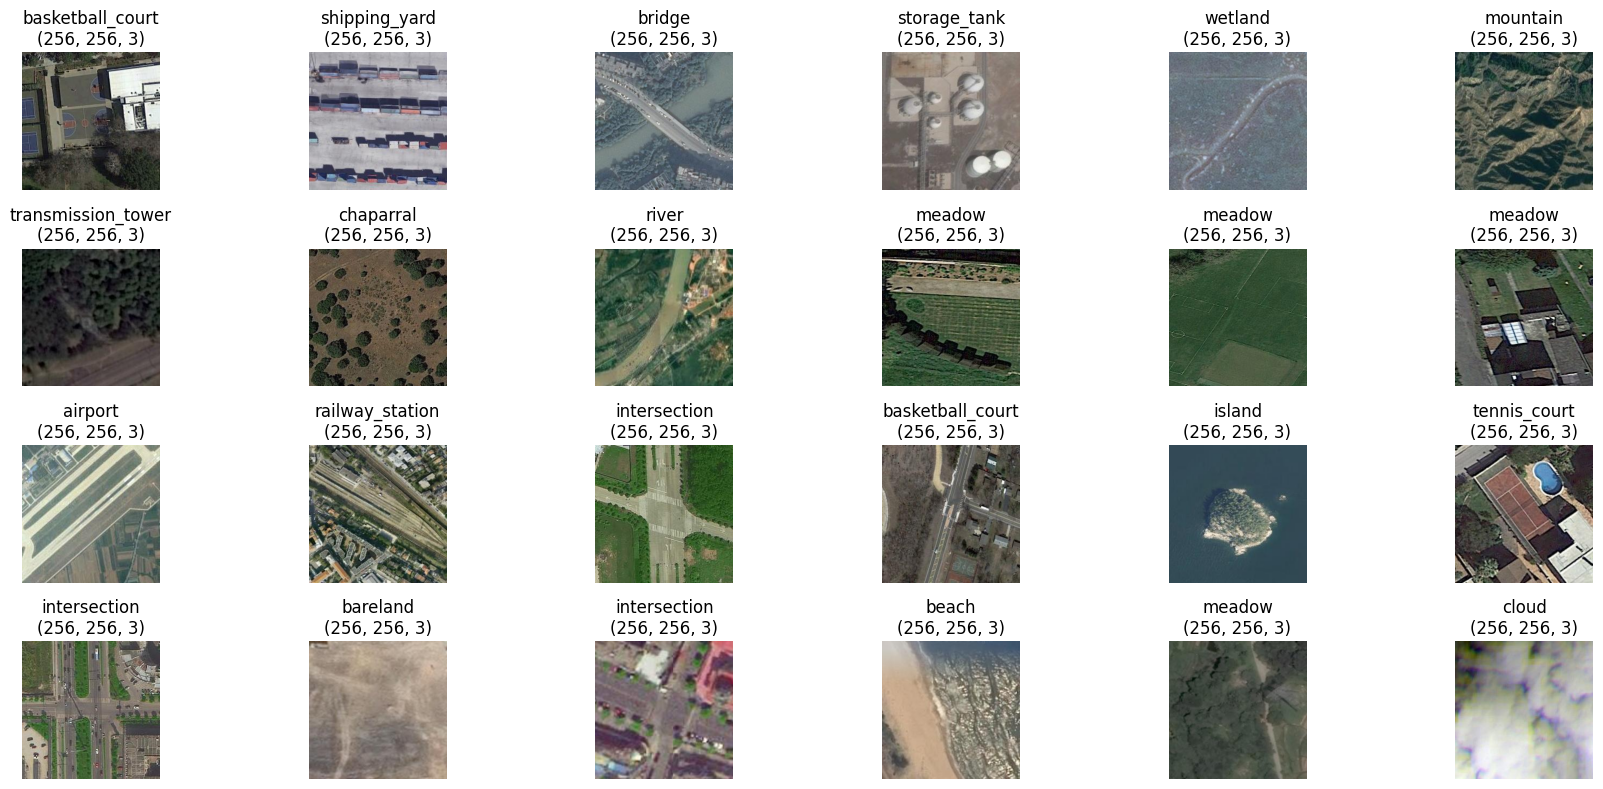

In [144]:

# Figure layout configuration
rows = 4
cols = 6
n_images = rows * cols

fig, axes = plt.subplots(rows, cols, figsize=(3 * cols, 2 * rows))

for idx, row in df_category.head(n_images).iterrows():
    # Reading the image
    #image = Image.open(row["path_image"])
    image = plt.imread(row["path_image"])
    
    # Getting the corresponding category_label
    category_label = row["category_str"]
    

    # Positioning of each image in the figure
    ax = axes[idx // cols, idx % cols]
    ax.imshow(image)
    ax.set_title('{}\n{}'.format(category_label, image.shape)) #replaced image.size to image.shape to also show the number of channels
    ax.axis("off")

plt.tight_layout()
plt.show()


### Image Information

In [145]:
# Getting image sizes
# (this cell can take several minutes, ~18 min.)
img_sizes = []
for idx,row in df_category.iterrows():
  img_sizes.append(imagesize.get(row["path_image"]))

In [146]:
# filter only unique values
set(img_sizes)

{(256, 256)}

Samples per category: [1762 2189 1500 2002 2895 2500 2500 2500 1798 2500 2783 2539 2500 2501
 2501 2500 2515 2500 2505 2110 2498 2499 2500 2502 2500 2500 2500 1682
 2502 2537 2500 2187 2500 2040 2500 2555 1829 2462 2500 2005 2500 2500
 2500 2601 2612 2050]


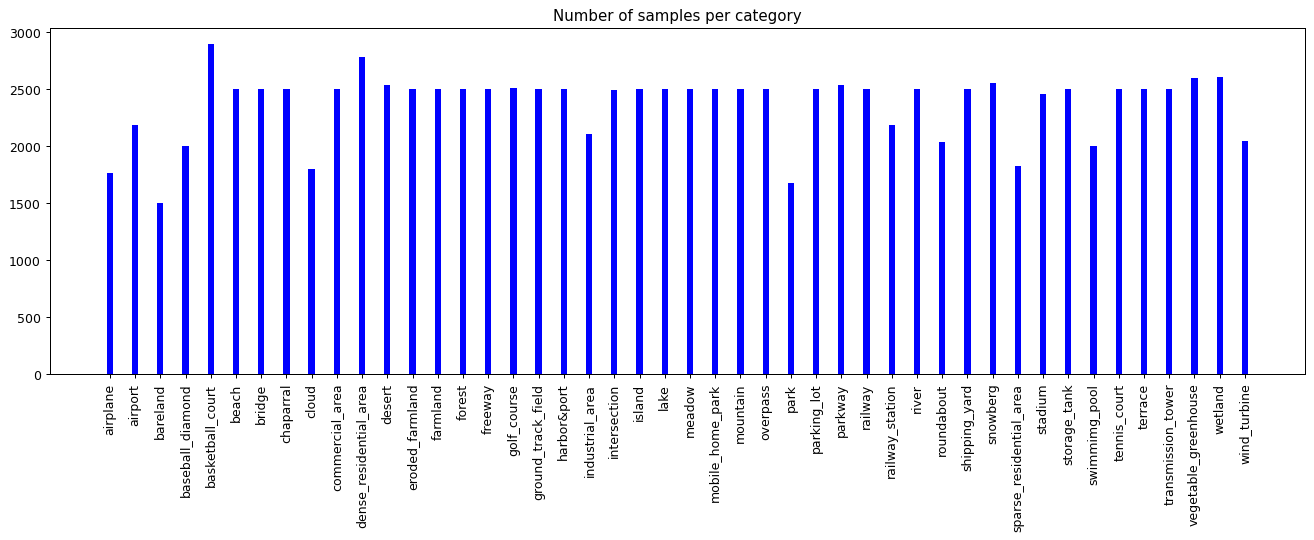

In [147]:
#This block of code is modified from the exercise class - wrong category_str-count pairings.

# Grouping by category_int and aggregating corresponding category_str values
category_int_str_mapping = df_category.groupby('category_int')['category_str'].unique()

# Number of samples per category
_, counts_category = np.unique(df_category["category_int"], return_counts=True)

# Number of categories
n_categories = len(category_int_str_mapping)

# Extracting class_str values in the correct order
names_categories = [category_int_str_mapping[i][0] for i in range(n_categories)]

# Figure configuration
bar_width = 0.25
br = np.arange(n_classes)

print("Samples per category: {}".format(counts_category))
# Bar plot
plt.figure(figsize=(18, 5), dpi=90)

plt.bar(br, counts_category, width=bar_width, color="blue")
plt.xticks([r for r in range(n_categories)], names_categories, rotation=90)
plt.title("Number of samples per category")

plt.show()

In [150]:
# Create Class count dataframe
class_count = pd.DataFrame(df_labels.sum(axis=0)).reset_index()
class_count.columns = ["class","count"]
class_count.drop(class_count.index[0], inplace=True)


In [151]:
class_count

,class,count
1,airplane,2306
2,airport,2481
3,bare soil,39345
4,baseball diamond,1996
5,basketball court,3726
6,beach,2485
7,bridge,2772
8,buildings,51305
9,cars,34064
10,chaparral,5954


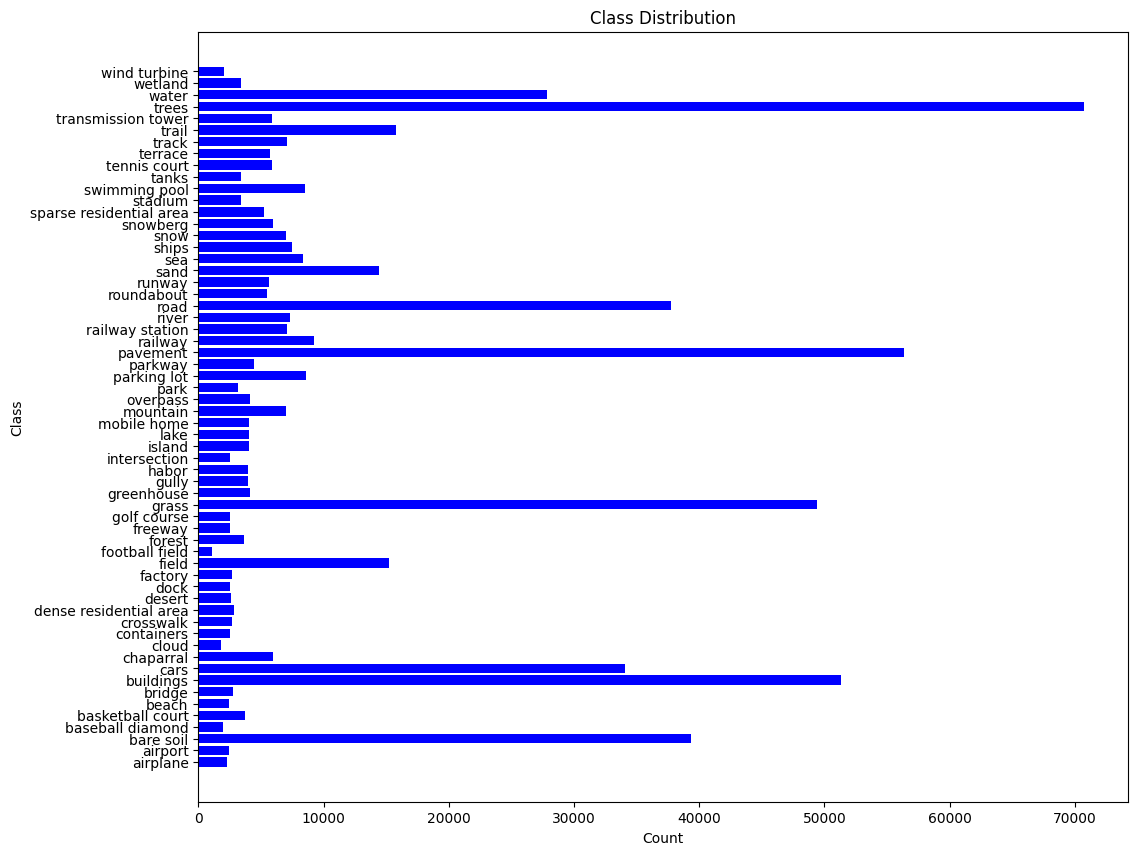

In [152]:
# Extracting data from DataFrame
classes = class_count["class"]
counts = class_count["count"]

# Creating a new figure
plt.figure(figsize=(12, 10))

# Plotting the bar chart
plt.barh(classes, counts, color="blue")

# Adding labels and title
plt.xlabel("Count")
plt.ylabel("Class")
plt.title("Class Distribution")

# Displaying the plot
plt.show()